Import an image to measure the background noise in it.

Note that Dragonfly007 (T13110627) had the G filter installed.

In [6]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid

%matplotlib inline

In [3]:
imagefile='/Users/lokhorst/Desktop/T13110627_36_light.fits'
d,h = fits.getdata(imagefile,header=True)

1907.0
2028.0


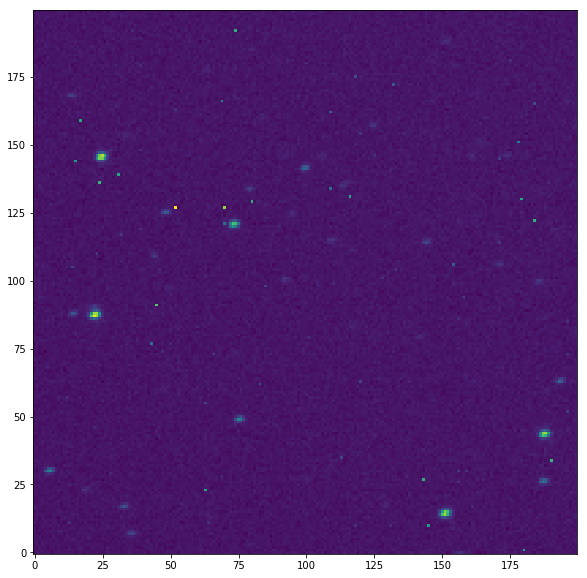

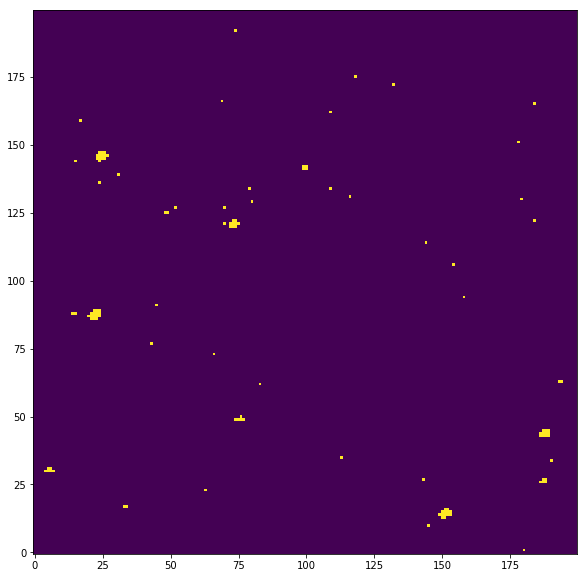

In [30]:
def plotdata(data,ax=None,bounds=None,colorbar=False):
    if ax is None:
        fig = plt.figure(figsize=(6, 3.2))
        ax = fig.add_subplot(111)
        oneplot=True
        ax.set_title('Pretend Data')
    if bounds is None:
        img = ax.imshow(data,origin='lower')
    else:
        img = ax.imshow(data,origin='lower',vmin=bounds[0],vmax=bounds[1])
    ax.set_aspect('equal')
    
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("right",size="10%",pad=0.15)
        cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
        cbar.ax.tick_params()

# Plot a portion of the image
smaller_d = d[200:400,200:400]
print np.median(smaller_d)
print np.median(d)

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(np.log10(smaller_d),ax=ax1)

# Make a 3sigma mask
mask = np.zeros(smaller_d.shape)
med = np.median(smaller_d)
sigma = np.std(smaller_d)
mask[smaller_d>(med+3.*sigma)]=1.

# Plot the mask
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
plotdata(mask,ax=ax1)

# Try and mask the data with the 3sigma mask
mx = np.ma.masked_array(smaller_d, mask=mask)

#plt.tight_layout()

In [12]:
h

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 3358 / length of data axis 1                          
NAXIS2  =                 2536 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
EXPTIME =                 600. / exposure time (seconds)                        
TEMPERAT=                 -10. / temperature (C)                                
IMAGETYP= 'light   '        